# 7. 伊辛模型与蒙特卡罗方法

在本章中，我们将要学习在统计物理中非常常见的模型----伊辛模型（Ising model）。伊辛模型作为一个非常简单的的模型，能够很好的对铁磁--顺磁相变进行描述。

同时，我们将学习，如何使用**模特卡洛**方法，对伊辛模型求解。

## 7.1 伊辛模型与平均场理论

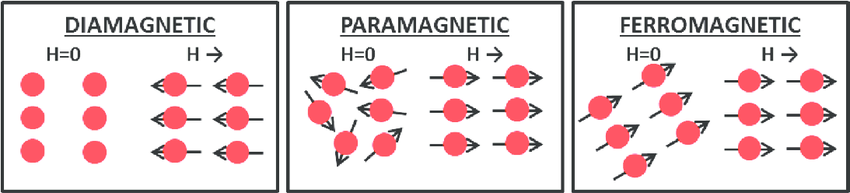

对于大多数的铁磁性物质，存在一个居里温度$T_c$：在温度低于$T_c$时，物质呈现铁磁性(ferrormagnetic)，在高于居里温度时，物质呈现顺磁性（paramagnetic）。这种现象大概率源自于**原子的热涨落和原子之间的相互作用的共同影响**。

为了解释物质的这种性质，我们必须建立一种能够考虑原子间的相互作用的模型。


我们可以假设，原子之间的相互作用仅仅发生在相邻原子之间，且只与原子自旋$s_i$（和电子自旋并不完全相同，可以粗略理解为决定原子磁矩的量子态）有关。
因此，如果我们假设原子自旋$s_i$都只能沿着某一个特定方向（z方向，$i$为原子的标记），并且每个原子都被固定在晶格中（格点上），我们可以写出描述铁磁性系统的哈密顿量（能量）：
$$
E = - J \sum_{<ij>}s_i s_j
$$
其中，$<ij>$表示该求和针对的是所有相邻的原子对，而$J$为相互作用常量，对于铁磁性物质为正数。

这样的对系统能量的描述，代表了自旋相同的原子对往往具有更低的能量($-J s_i s_j$为负)，这意味着对于铁磁性系统，当温度极低时，大多数原子对将具有相同的自旋取向，这解释了铁磁材料自发磁化的原因。

然而，实际的物质具有温度，当物质达到热平衡时，不可能所有的原子自旋都为同方向。

原子的自旋取向应当倾向于让自由能$F=U-TS$最低。

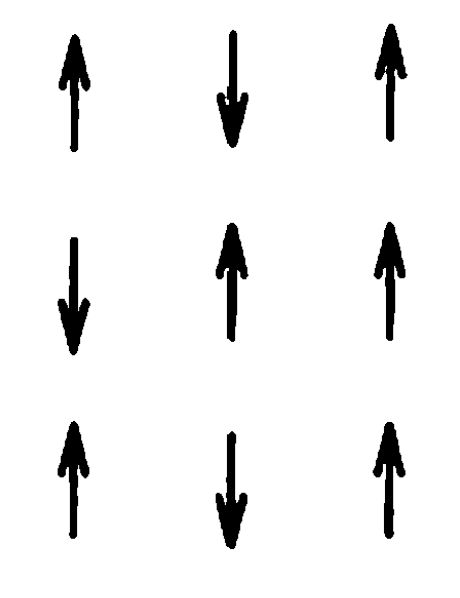

#### 我们希望能够通过求解伊辛模型，找到总磁化强度$M$和温度$T$的关系！

如果我们可以求得所有原子的平均自旋$\langle s_i \rangle$，总磁化强度
$$
M = N \langle s_i \rangle
$$

其中，$N$为总的原子数目。而实际上$\langle s_i \rangle$的求解非常困难。所以一般使用“平均场“理论来进行求解。

首先我们需要考虑施加外部磁场$H$时，体系的能量变为：
$$
E = -J \sum_{\langle ij\rangle}s_i s_j - \mu H \sum_i s_i
$$

其中$\mu$为每个原子的磁矩。

让我们现在暂时假设只有一个自旋为$s_i$的原子，具有可能的两个态$s_i=\pm1$，对应能量$E=\mp \mu H $（因为$-J \sum_{\langle ij\rangle}s_i s_j$项可以被忽略）。

两个态出现的概率分别是

$$
\begin{eqnarray}
P_+ &=& e^{+\mu H/kT} / Z \\
P_- &=& e^{-\mu H/kT} / Z
\end{eqnarray}
$$

其中$Z$是配分函数

$$
Z = e^{+\mu H/kT} + e^{-\mu H/kT}
$$

于是，对于单原子
$$
\langle s_i \rangle = \sum_{s_i \pm 1} s_i P_{\pm} = P_+ - P_- = \tanh(\mu H / k T)
$$

需要注意的是，该结果同样适用于**多原子**但原子之间无相互作用的情形（想想为什么）。

如果我们考虑有$N$个有相互作用的原子的情形且外加磁场$H=0$的情形，我们则必须开始考虑哈密顿量里的$-J \sum_{\langle ij\rangle}s_i s_j$项。

**而平均场理论的关键假设**，就在于认为$-J \sum_{\langle ij\rangle}s_i s_j$和第二项$- \mu H \sum_i s_i$具有类似的贡献，从而可以用$\mu$和一个有效的（effective） $H_{eff}$所描述。

具体地说，平均场理论假设：
$$
E = -J \sum_{\langle ij\rangle}s_i s_j  = -\sum_i s_i \left(J\sum_{j\;as\; neighbor\;of\;i} s_j\right) \approx  -\sum_i s_i \left(\mu H_{eff} \right)
$$

如果进一步假设$s_j=\langle s \rangle$可见

$$
H_{eff} = \frac{J}{\mu} \sum_{j\;as\; neighbor\;of\;i} \langle s_j \rangle = \frac{zJ}{\mu} \langle s\rangle
$$

其中，$z$代表了叫做配位数的整数。

通过这样的平均场近似，我们可以利用之前得到的无相互作用的结果:$\langle s_i \rangle = \sum_{s_i \pm 1} s_i P_{\pm} = P_+ - P_- = \tanh(\mu H / k T)$,把$H$用$H_{eff}$的表达式代替后，我们可以得到方程：
$$
\langle s \rangle  = \tanh(z J \langle s \rangle / k T)
$$


$\langle s\rangle$也叫“序参量（order parameter）”。可以看出，在使用平均场近似之后，我们可以很简单的得到一个关于序参量的超越方程。

### 7.1.1 数值求解平均场理论

下面，需要我们找到这个超越方程可能存在的解。

首先让我们尝试画出方程左右两边的图像。

In [401]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
def curve_plot(xs, ys, xlabel='x', ylabel='y', legends=None,
               xlim=None, ylim=None, scatter=False, title=None, figsize=(10,6), logx=False, logy=False):

    if isinstance(xs, np.ndarray):
        xs = [xs]
    if isinstance(ys, np.ndarray):
        ys = [ys]
    
    # 调整图片的大小
    plt.figure(figsize=figsize)
    
    # 画出轨迹
    for x, y in zip(xs, ys):
        if(scatter == False):
            plt.plot(x, y)
        else:
            plt.scatter(x,y)
    
    # 加入x轴标记
    plt.xlabel(xlabel, fontsize=24)
    # 加入y轴标记
    plt.ylabel(ylabel, fontsize=24)

    if(legends != None):
        plt.legend(legends, fontsize=24)
    if(xlim != None):
        plt.xlim(xlim)
    if(ylim != None):
        plt.ylim(ylim)
    if(title!= None):
        plt.title(title, fontsize=24)

    if(logx ==True):
        plt.xscale('log')
    if(logy ==True):
        plt.yscale('log')

    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    plt.show()

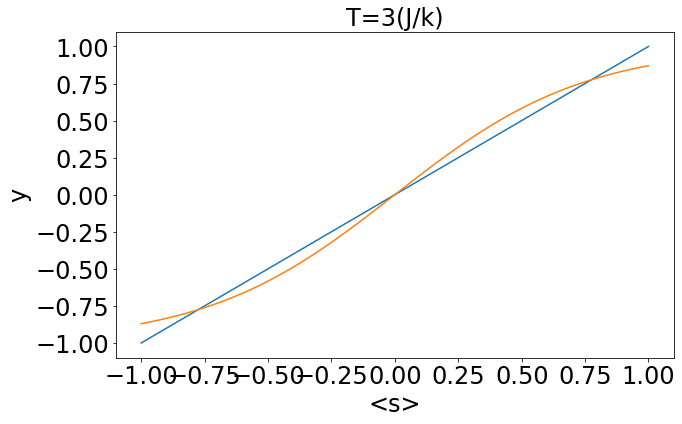

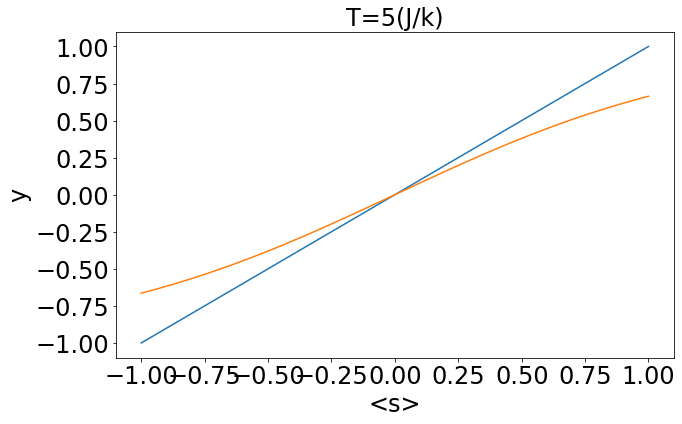

In [3]:
xs = np.linspace(-1, 1, 100)
z = 4
# 令J / k = 1
Jdivk = 1
# T = 3
T = 3

yr = np.tanh(z * Jdivk * xs / T)

yl = xs

curve_plot([xs, xs], [yl, yr], xlabel='<s>', title='T=3(J/k)')

# 改变T 为 5

T = 5
yr = np.tanh(z * Jdivk * xs / T)
curve_plot([xs, xs], [yl, yr], xlabel='<s>',title='T=5(J/k)')

对比上面两张图，我们可以发现，对于不同的温度$T$，方程左右两边可能由没有非0交点的情况（无非0的解），变成有交点的情况（有非0的解）。

而如果该方程只有$\langle s \rangle = 0$的解，对应了所谓的顺磁相；而如果该方程具有$\langle s \rangle$的解，意味着具有非0的总磁矩，对应了所谓的铁磁相！

下面，我们需要借助我们已经掌握的数值方法，精确求解出$\langle s\rangle$与温度的关系。

我们需要针对函数
$$
f(\langle s \rangle) = \langle s \rangle  - \tanh(z J \langle s \rangle / k T)
$$
寻找其在正半轴的根。我们可以利用二分法（或我们学过的其他任何方法）。

In [470]:
z = 4
# 令J / k = 1
Jdivk = 1

def f(x, T):
    return x - np.tanh(z * Jdivk * x / T)

# 二分法求解
def bisection(l, r, T, tar_prec):
    prec = 1e10
    if(f(l, T) * f(r, T) > 0):
        # '错误，f在l和r处同号！'
        return -1
        
    while(prec > tar_prec):
        mid = (l + r) / 2
        if f(mid, T) * f(l, T) > 0:
            l = mid
        else:
            r = mid
        prec = np.abs(f(mid, T))
    return mid

# 主求解函数，求解不同温度下的<s>
def solve_ising():
    # 离散化不同的温度
    Ts = np.linspace(0.1, 6, 100)
    ys = []
    # 设定二分法对于<s>的左边界
    left = 1e-6
    # 右边界自然为1
    right = 1
    for T in Ts:
        res = bisection(left, right, T, tar_prec=1e-8)

        # 如果未找到解（bisection 返回-1）
        if(res == -1):
           res = 0
        ys.append(res)
            
    return Ts, np.array(ys)
    

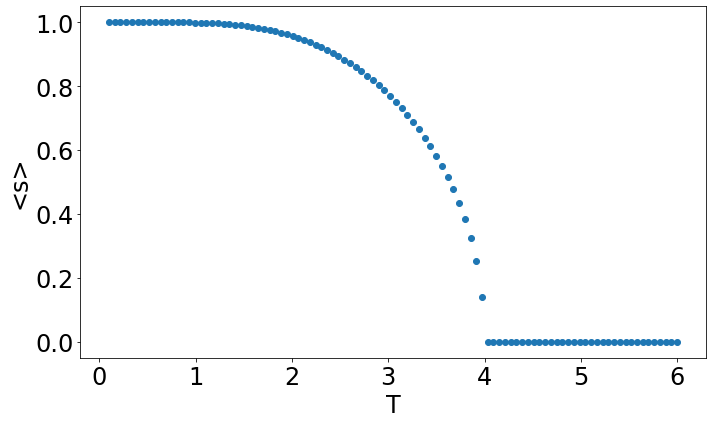

In [500]:
# 调用函数并画图
Ts, ys = solve_ising()
curve_plot(Ts, ys, xlabel='T',ylabel='<s>', scatter='True')

可见，在接近临界温度$T_c$温度时，物体磁化强度会非常小，且导数会趋近于无穷大，暗示了可能存在的相变！

同时，在$\langle s \rangle$比较小时，$\tanh(z J \langle s \rangle / k T)$的自变量很小，因此，我们可以使用近似 $\tanh x \approx x - x^3 /3 $。

因此，当在$\langle s \rangle$很小时，方程$\langle s \rangle  = \tanh(z J \langle s \rangle / k T)$可以近似被写作：

$$
\langle s \rangle \approx \frac{z J \langle s \rangle}{kT} - \frac13 \left(\frac{zJ\langle s \rangle}{kT}\right)^3
$$

该三次方程有非0解：
$$
\langle s \rangle = \sqrt{\frac{3}{T} \left(\frac{kT}{zJ}\right)^3} \left(\frac{zJ}{k} - T \right)^{1/2} \sim (T_c - T)^{\beta}
$$

可以看出，使用平均场近似之后可得: 临界温度$T_c = \frac{zJ}{k}$, 同时，临界指数$\beta = 0.5$。注意：$z$代表了每一个原子的邻居数目，对于一维系统一般为2，二维系统一般为4。

### 7.2 使用蒙特卡罗法求解伊辛模型

尽管我们在上一章中，成功的利用了平均场近似求解了伊辛模型。我们对临界温度$T_c$和临界指数$\beta$的计算，和伊辛模型的精确解并不相符（例如，二维伊辛模型精确解预言了$\beta = 1/8$，精确解的方法请参考统计物理教科书）。需要注意的是，尽管在至多2维的情形下，伊辛模型可以被精确求解，但其求解方法相当复杂困难。我们在这一章里，将尝试使用**模特卡洛**方法，对伊辛模型进行相对精确也相对简单的求解。

下面，我们给出针对伊辛模型的基于蒙特卡罗的Metroplis 算法：


1. 对于格点中的每一个原子$i$，估算其翻转所需的能量$E_{flip,i}$，该能量与该原子贡献的势能相反号，即可通过公式$E_{flip} = 2 \times J s_i \sum_{j\;as\; neighbor\;of\;i} s_j$计算。对于边界上的原子，采用周期性边界条件。
2. 如果$E_{flip} < 0$，意味着不需要热涨落，该原子可以自然翻转。于是翻转该磁矩(乘以-1)。
3. 如果$E_{flip} > 0$，意味着热涨落**有$\exp(-E_{flip} / kT)$的概率**让该原子翻转。为了实现这个概率，我们可以尝试利用`np.random.rand()`函数从`0-1`之间随机挑选一个数`r`。如果$r < \exp(-E_{flip} / kT)$，那么就翻转，否则不翻转。
4. 重复过程1-3，在一定的重复计算之后，计算每次迭代之后得到的平均磁矩$<s>$。


In [314]:
def Metroplis(spins, Jdivk, n_iter, T, do_plot=False):
    n = len(spins)
    n_iter_in = n_iter
    avg_s, avg_E = [], []
    
    while(n_iter > 0):

        # 如果作图为真，则画出二维热力图
        if(do_plot == True):
            spin_visual(spins)
        
        for i in range(n):
            for j in range(n):
                E_flip = 2 * spins[i, j] * (spins[(i+1)%n, j]+spins[(i-1)%n, j] + spins[i, (j+1)%n] +  spins[i, (j-1)%n])
                # 对于 E_flip小于0的原子，翻转
                if(E_flip < 0):
                    spins[i, j] = - spins[i, j]
                else:
                    # 对于E_flip > 0的原子，计算其翻转概率
                    p = np.exp(-E_flip * Jdivk / T)
                    # 翻转rand < p的原子
                    if(np.random.rand() < p):
                        spins[i, j] = -spins[i, j]

        # 当迭代完成了一半时，统计后一半迭代过程的平均spin
        if(n_iter < n_iter_in / 2):
            avg_s.append(np.abs(spins.sum()) / (n**2))
        n_iter -= 1

    avg_s = np.array(avg_s)
    print('平均自旋大小' ,avg_s.mean())
    return avg_s

In [279]:
# 画图函数
def spin_visual(spins):
    plt.figure(figsize=(9, 9))   
    n = len(spins)
    X, Y = np.meshgrid(range(n), range(n))
    plt.pcolormesh(X, Y, spins);

In [317]:
n = 16
spins = np.ones((n, n))

让我们先看一下迭代的图像

平均自旋大小 0.98828125


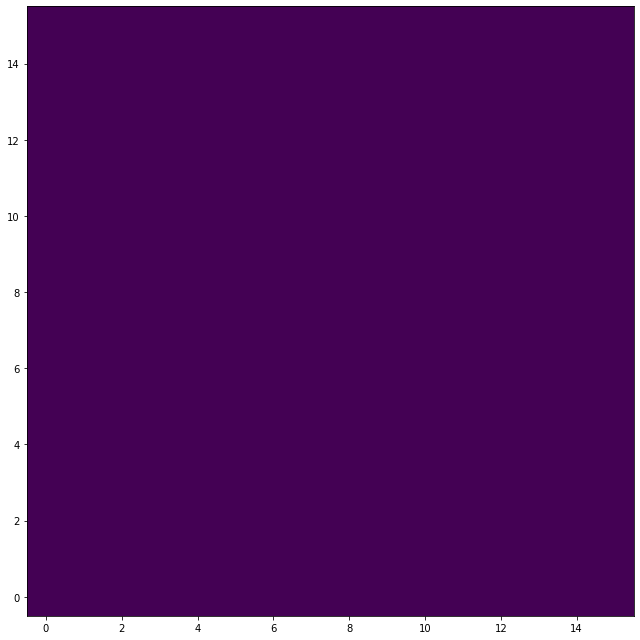

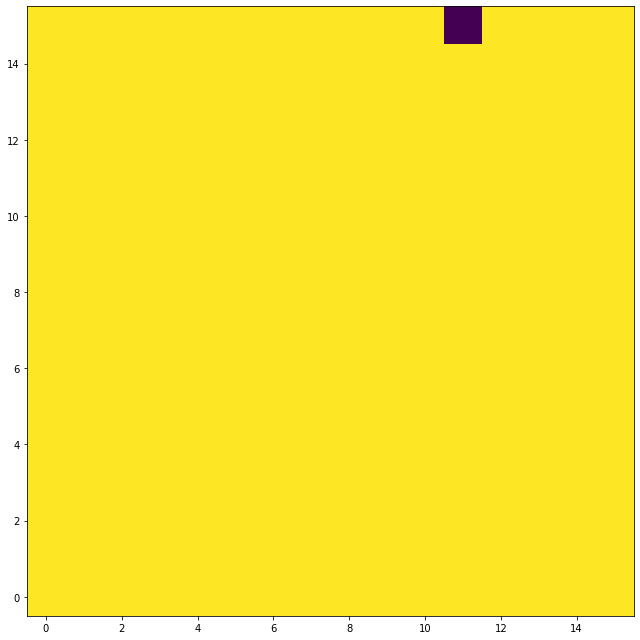

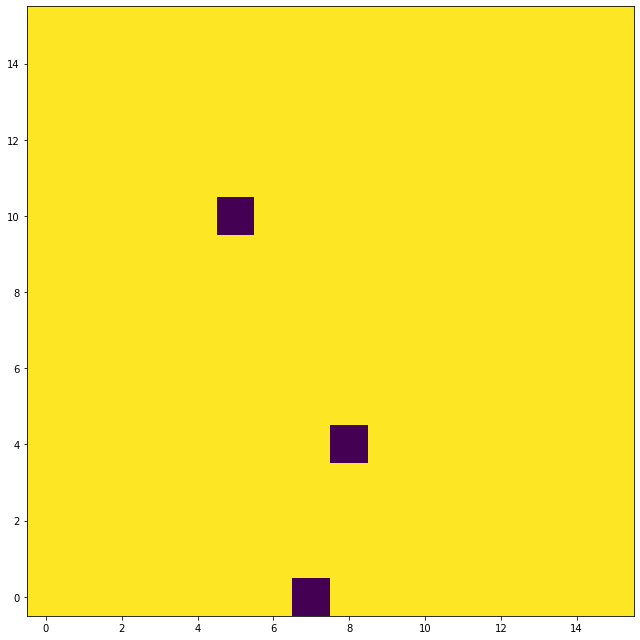

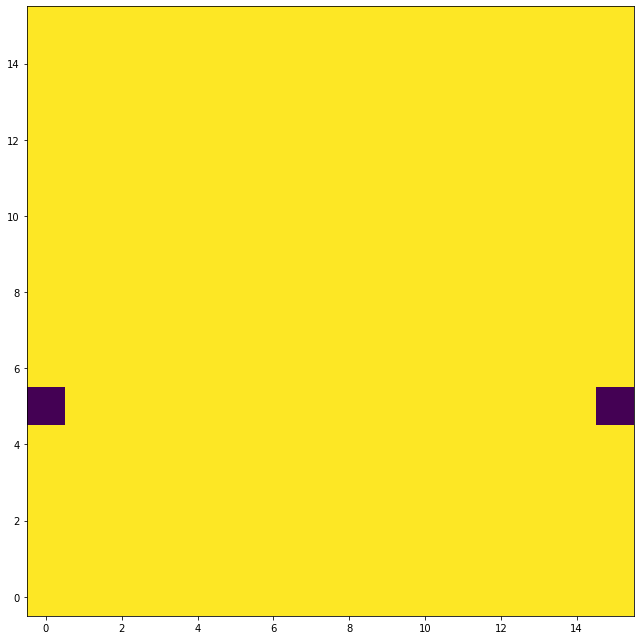

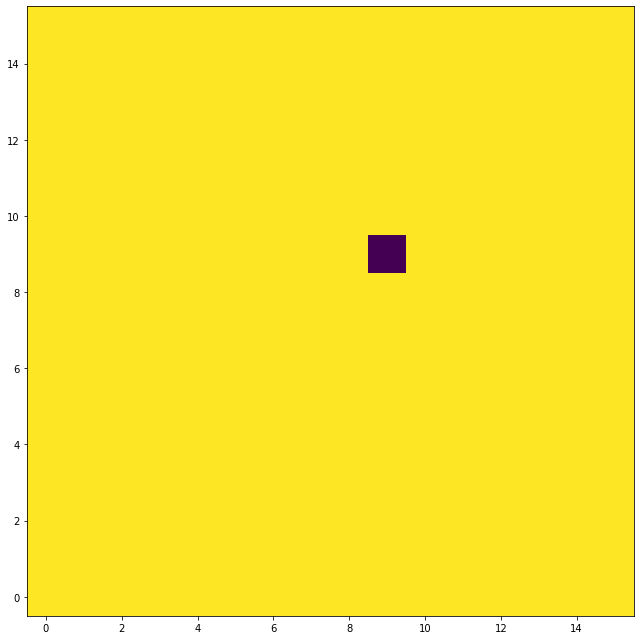

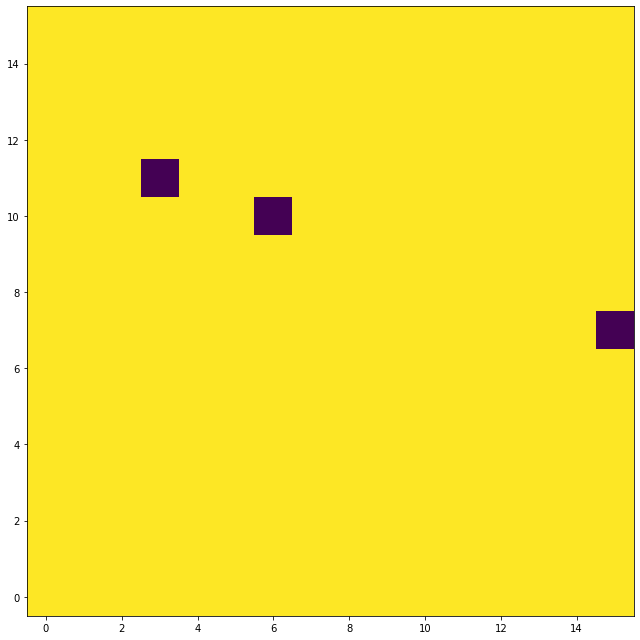

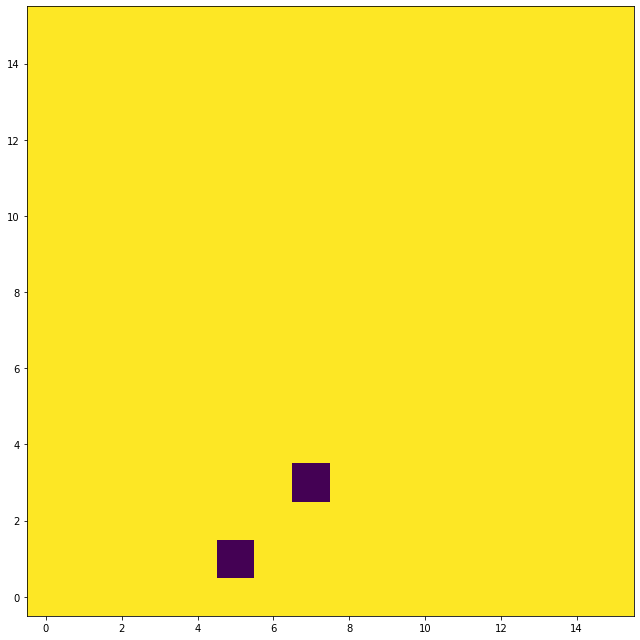

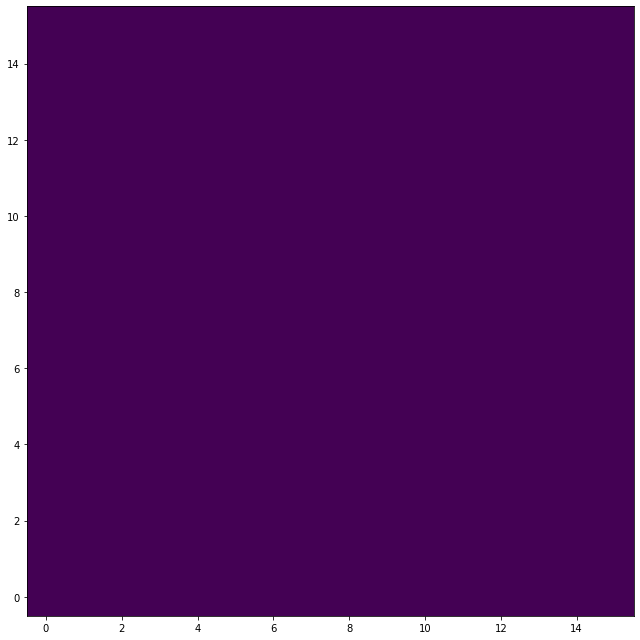

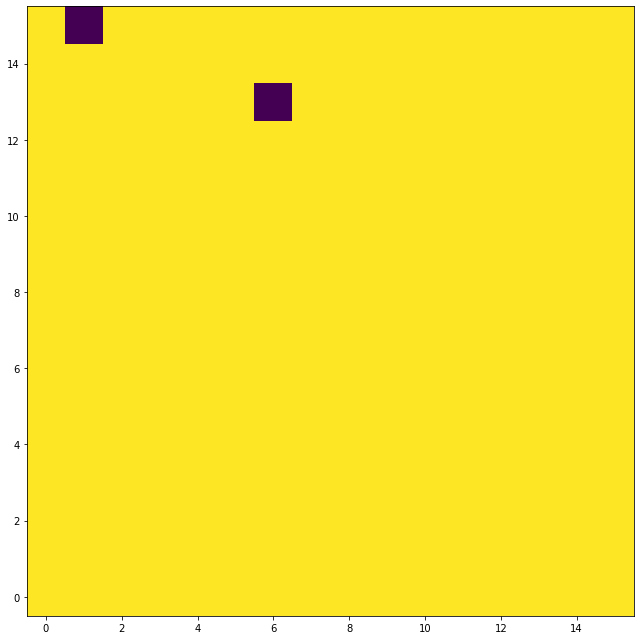

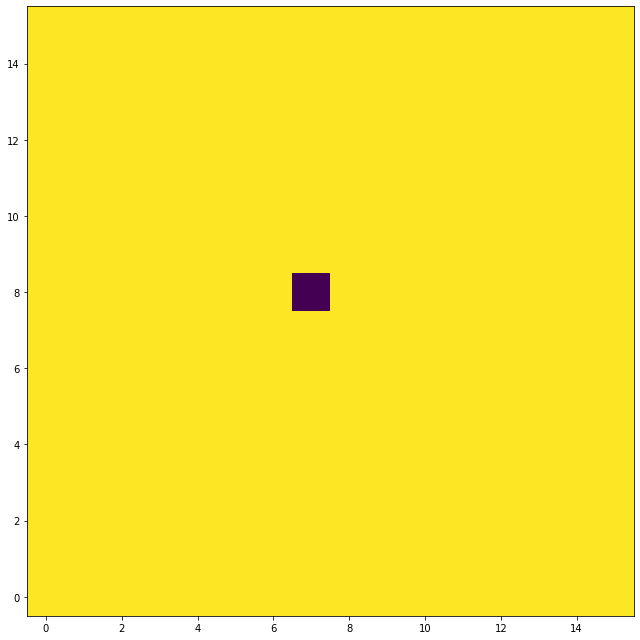

In [318]:
avg_s = Metroplis(spins, Jdivk=1, n_iter=10, T=1.5, do_plot=True)

In [329]:
n = 16
spins = np.ones((n, n))
# 计算T=1时的<s>
avg_s_T1 = Metroplis(spins, Jdivk=1, n_iter=3000, T=1)

# 计算T=2时的<s>
spins = np.ones((n, n))
avg_s_T2 = Metroplis(spins, Jdivk=1, n_iter=3000, T=2)

# 计算T=2.8时的<s>
spins = np.ones((n, n))
avg_s_T3 = Metroplis(spins, Jdivk=1, n_iter=3000, T=2.8)

平均自旋大小 0.9993016177451635
平均自旋大小 0.9124833222148099
平均自旋大小 0.20571005670446965


我们可以进一步画出`<s>`在迭代中的变化趋势

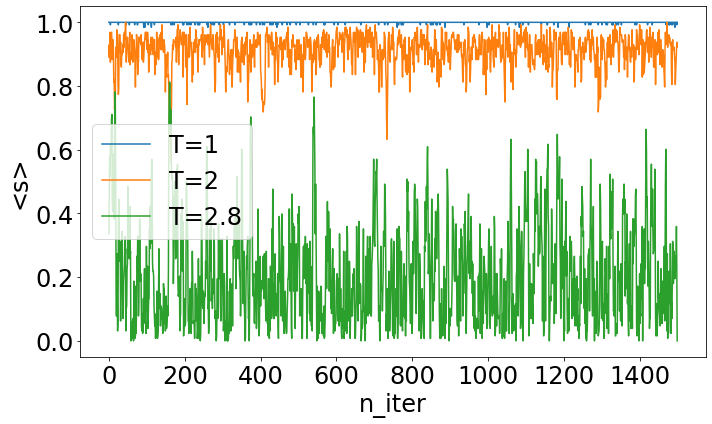

In [330]:
xs = np.arange(len(avg_s_T1))
curve_plot([xs, xs, xs], [avg_s_T1, avg_s_T2, avg_s_T3], xlabel='n_iter',ylabel='<s>',
          legends=['T=1','T=2','T=2.8'])

最后，我们增大`n`到64，然后画出`<s>`与温度$T$之间的关系：

In [343]:
%%time
Ts2 = np.linspace(0.5, 4, 20)
n = 64

s_list = []

for T in Ts2:
    spins = np.ones((n, n))
    avg_s = Metroplis(spins, Jdivk, 2000, T, do_plot=False)
    s_list.append(avg_s.mean())


平均自旋大小 1.0
平均自旋大小 0.9999824042792793
平均自旋大小 0.9997771208708709
平均自旋大小 0.9989168856356356
平均自旋大小 0.9962858366178678
平均自旋大小 0.9905545193631131
平均自旋大小 0.9795982505943444
平均自旋大小 0.9585097793105606
平均自旋大小 0.9203456386073574
平均自旋大小 0.8279988973348348
平均自旋大小 0.23869670451701702
平均自旋大小 0.09955072259759759
平均自旋大小 0.06228982889139139
平均自旋大小 0.04100927098973974
平均自旋大小 0.03849210538663664
平均自旋大小 0.034293570914664666
平均自旋大小 0.03275247904154154
平均自旋大小 0.030638059934934934
平均自旋大小 0.02761990506131131
平均自旋大小 0.026342748998998997
CPU times: user 2min 44s, sys: 145 ms, total: 2min 44s
Wall time: 2min 45s


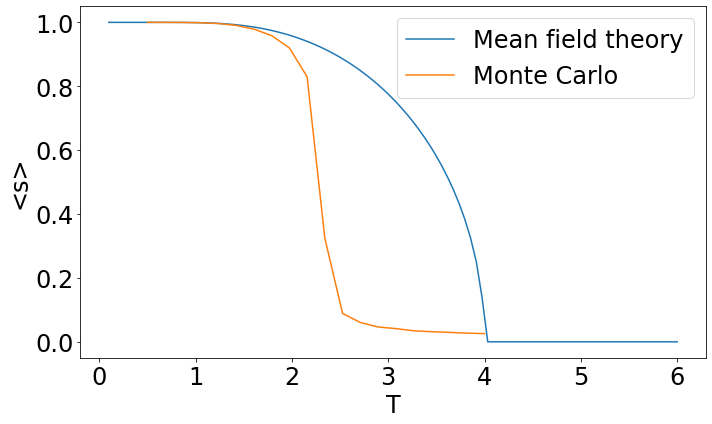

In [342]:
curve_plot([Ts, Ts2], [ys, np.array(s_list)], xlabel='T', ylabel='<s>', 
          legends=['Mean field theory','Monte Carlo'])

很显然，蒙特卡罗算法给予了我们一个完全不同的$T_c$以及临界指数$\beta$。对于2维伊辛模型的精确解。我们有$T_c\approx 2.3$以及$\beta = 1/8$，尽管从图中可以看出，蒙特卡罗法给予我们的结果和精确解还有一定距离，但其结果已经远远好于平均场近似给予我们的结果。

同时，我们的蒙特卡罗模拟仅仅使用了相对小的格点$n=64$。如果我们在很大的计算机上进行长时间的模拟，我们会发现蒙特卡罗的结果会很好的逼近解析的解。

关于对伊辛模型发生的二阶相变过程所附带的其他热力学量变化规律的分析，我们在这里留给大家自学或者在热统课上学习。

### 番外1：在Python里使用类C程序

我们刚刚尝试了在大小为64x64的格子上，使用了蒙特卡罗算法。一次运行需要几千次迭代。尽管数据规模其实并不大，但我们已经发现，算法运行的速度已经变得很慢（要画出上图需要大约2分钟的运算）。

这是由于在蒙特卡罗算法中，我们频繁的使用了双重`for`循环，而我们之前说过，对于Python程序，`for`循环的效率往往非常低下。如果我们能做一些优化，那么我们将可以模拟更大的格子，从而得到更准确的结果。

在Python中，如果我们的程序不得不需要类似的循环，我们可以考虑使用叫做`Cython`的工具。它可以把类似`Python`的代码翻译成`C`语言并编译运行，从而能够大幅度提高运行效率。

我们在这里，给出使用`Cython`来实现模特卡洛算法的例子。`Cython`现在被广泛应用在各种Python的软件包中，如果大家对`Cython`感兴趣，可以参考官网：https://cython.readthedocs.io/en/latest/index.html 以及自学相关教程。

In [346]:
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [508]:
#如果上面的语句报错，取消注释之后，试试下面的语句
#import sys
#!{sys.executable} -m pip install cython
#%load_ext Cython

In [574]:
%%cython
import numpy as np
import cython
cimport numpy as np

# 引入cython 需要用到的相关库
cimport cython
ctypedef np.double_t DTYPE_t

from libc.math cimport sqrt, sin, M_PI, exp, abs
from libc.stdlib cimport rand, RAND_MAX

# cython 函数需要指定参数类型
cpdef Metroplis_C(int [:,:] spins, double Jdivk, int n_iter, double T):
    # 循环中需要的变量都需要使用cdef 定义
    cdef int n = len(spins)
    cdef int n_iter_in = n_iter

    cdef double [:] avg_s = np.zeros(n_iter)

    cdef int i, j
    cdef double E_flip, p
    while(n_iter > 0):
        n_iter -= 1
        for i in range(n):
            for j in range(n):
                E_flip =  2*spins[i, j] * (spins[(i+1)%n, j]+spins[(i-1)%n, j] + spins[i, (j+1)%n] +  spins[i, (j-1)%n])
                # 对于 E_flip小于0的原子，翻转
                if(E_flip < 0):
                    spins[i, j] = - spins[i, j]
                else:
                    # 对于E_flip > 0的原子，计算其翻转概率
                    p = exp(-E_flip * Jdivk / T)
                    # 翻转rand < p的原子
                    # 注意在cython函数中尽量不要使用numpy所提供的函数
                    if(float(rand()) / RAND_MAX < p):
                        spins[i, j] = -spins[i, j]

                avg_s[n_iter] += spins[i, j]
        
        avg_s[n_iter] = abs(avg_s[n_iter]) / (n**2)
        

    avg_s = np.asarray(avg_s)[0:int(n_iter_in / 2)]
    print('平均自旋大小' ,np.mean(avg_s))
    return avg_s

Content of stderr:
In file included from /Users/ctian/.cache/ipython/cython/_cython_magic_7836784ac5159ef269a846d4e37ca14fdb2819c5.c:1124:
In file included from /Users/ctian/Applications/miniconda3/envs/py_crse/lib/python3.9/site-packages/numpy/core/include/numpy/arrayobject.h:5:
In file included from /Users/ctian/Applications/miniconda3/envs/py_crse/lib/python3.9/site-packages/numpy/core/include/numpy/ndarrayobject.h:12:
In file included from /Users/ctian/Applications/miniconda3/envs/py_crse/lib/python3.9/site-packages/numpy/core/include/numpy/ndarraytypes.h:1929:
/Users/ctian/Applications/miniconda3/envs/py_crse/lib/python3.9/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: "Using deprecated NumPy API, disable it with "          "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-W#warnings]
#warning "Using deprecated NumPy API, disable it with " \
 ^
/Users/ctian/.cache/ipython/cython/_cython_magic_7836784ac5159ef269a846d4e37ca14fdb2819c5.c:6079:28: w

In [575]:
%%time
Ts2 = np.linspace(0.5, 4, 20)
n = 64

s_list = []

for T in Ts2:
    spins = np.ones((n, n), dtype=np.int32)
    avg_s = Metroplis_C(spins, Jdivk, 2000, T)
    s_list.append(np.mean(avg_s))


平均自旋大小 1.0
平均自旋大小 0.99998681640625
平均自旋大小 0.9997802734375
平均自旋大小 0.9988974609375
平均自旋大小 0.99630517578125
平均自旋大小 0.990662109375
平均自旋大小 0.97908447265625
平均自旋大小 0.958478515625
平均自旋大小 0.92001611328125
平均自旋大小 0.8285341796875
平均自旋大小 0.34035546875
平均自旋大小 0.09643115234375
平均自旋大小 0.0533837890625
平均自旋大小 0.0471845703125
平均自旋大小 0.0404990234375
平均自旋大小 0.03499853515625
平均自旋大小 0.03233935546875
平均自旋大小 0.02990966796875
平均自旋大小 0.02693408203125
平均自旋大小 0.02661279296875
CPU times: user 2.35 s, sys: 4.6 ms, total: 2.36 s
Wall time: 2.37 s


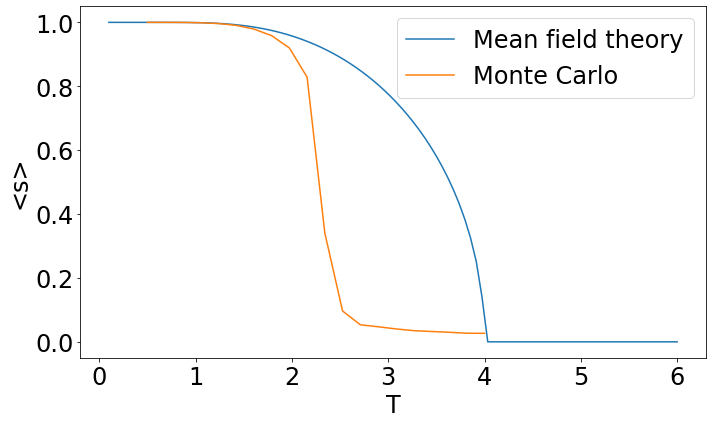

In [576]:
curve_plot([Ts, Ts2], [ys, np.array(s_list)], xlabel='T', ylabel='<s>', 
          legends=['Mean field theory','Monte Carlo'])

> 又上面的例子可以看出，`Cython`相比Python加速了足足80倍！

## 7.1.3 伊辛模型的缩放（scaling）性质


让我们重新考虑平均场近似，这次我们加上一个外加磁场$H$。此时，序参量$\langle s \rangle$所满足的方程变为：

$$
\langle s \rangle  = \tanh\left[\left(z J \langle s \rangle  + \mu H\right) / kT\right]
$$

同样的，当$\langle s \rangle$很小时， 对$\tanh$函数展开可得：

$$
\langle s \rangle \approx \frac{z J \langle s \rangle}{kT} - \frac13 \left(\frac{zJ\langle s \rangle}{kT}\right)^3 + \frac{\mu H }{kT}
$$


（注意：在这里我们对$\langle s\rangle$保留了3次方项，而对H只保留了1次方项）。

进一步的，我们令$h\equiv \mu H / J$, $m\equiv \langle s\rangle$, $t\equiv 1 - zJ/kT$，引入常系数$b$和$u$,我们可以写出如下的隐式的方程：
$$
h = b t m + u m^3
$$

该方程联系了一系列的宏观量（H, $\langle s\rangle$, $T$）其实是一种物态方程（类似于PV=nRT）。

该方程的解$m(t, h)$对于任意正实数$\lambda$满足如下的性质：

$$
m(\lambda^{1/2}t, \lambda^{3/4}h) = \lambda^{1/4} m(t, h)
$$

而这样的满足类似性质的多变量函数，其实可以化简成一个单变量函数。如果我们令$\lambda = |t|^{-2}$，我们有
$$
m(t, h) = |t|^{1/2} m\left(\pm 1, \frac{h}{|t|^{3/2}}\right) = |t|^{1/2} f_{\pm} \left(\frac{h}{|t|^{3/2}}\right)
$$

这样多变量函数$m(t, h)$可以被写成两个单变量函数$f_{\pm}$，其中$f_+$对应$t>0$，$f_-$对应$t<0$。

尽管我们已经知道，平均场论所预言的序参量$\langle s\rangle$和$T$的关系，以及对$T_c$和临界指数$\beta$的相关计算并不正确。但上式中对序参量的“缩放性(scaling)”的预测，却是精确成立的。

对于2维的伊辛模型，的确满足广义的缩放性：
$$
m(t, h)  = |t|^{\beta} f_{\pm}\left(\frac{h}{|t|^{\beta \delta}}\right)。
$$

平均场近似给出$\beta = 0.5$, $\delta = 3$的结果，而精确解给出$\beta = 1/8$, $\delta =3$的结果。

下面让我们尝试考虑引入非0的外加磁场$H$时的伊辛模型的蒙特卡罗模拟。引入$H$后，我们仅仅需要对$E_{flip}$进行相应改变就可以了。

In [484]:
%%cython
import numpy as np
import cython
cimport numpy as np

cimport cython
ctypedef np.double_t DTYPE_t

from libc.math cimport sqrt, sin, M_PI, exp, abs
from libc.stdlib cimport rand, RAND_MAX

cpdef Metroplis_C_withH(int [:,:] spins, double Jdivk, int n_iter, double T, double H):
    cdef int n = len(spins)
    cdef int n_iter_in = n_iter

    cdef double [:] avg_s = np.zeros(n_iter)

    cdef int i, j
    cdef double E_flip, p
    while(n_iter > 0):
        n_iter -= 1
        for i in range(n):
            for j in range(n):
                E_flip = 2 * spins[i, j] * (spins[(i+1)%n, j]+spins[(i-1)%n, j] + spins[i, (j+1)%n] +  spins[i, (j-1)%n]) + 2*H * spins[i, j]
                # 对于 E_flip小于0的原子，翻转
                if(E_flip < 0):
                    spins[i, j] = - spins[i, j]
                else:
                    # 对于E_flip > 0的原子，计算其翻转概率
                    p = exp(-E_flip * Jdivk / T)
                    # 翻转rand < p的原子
                    if(float(rand()) / RAND_MAX < p):
                        spins[i, j] = -spins[i, j]

                avg_s[n_iter] += spins[i, j]
        
        avg_s[n_iter] = abs(avg_s[n_iter]) / (n**2)
        

    avg_s = np.asarray(avg_s)[0:int(n_iter_in / 2)]
    #print('平均自旋大小' ,np.mean(avg_s))
    return avg_s

Content of stderr:
In file included from /Users/ctian/.cache/ipython/cython/_cython_magic_631341670f26ead9f2f9df06094365418cea7845.c:1122:
In file included from /Users/ctian/Applications/miniconda3/envs/py_crse/lib/python3.9/site-packages/numpy/core/include/numpy/arrayobject.h:5:
In file included from /Users/ctian/Applications/miniconda3/envs/py_crse/lib/python3.9/site-packages/numpy/core/include/numpy/ndarrayobject.h:12:
In file included from /Users/ctian/Applications/miniconda3/envs/py_crse/lib/python3.9/site-packages/numpy/core/include/numpy/ndarraytypes.h:1929:
/Users/ctian/Applications/miniconda3/envs/py_crse/lib/python3.9/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: "Using deprecated NumPy API, disable it with "          "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-W#warnings]
#warning "Using deprecated NumPy API, disable it with " \
 ^
/Users/ctian/.cache/ipython/cython/_cython_magic_631341670f26ead9f2f9df06094365418cea7845.c:6066:28: w

In [493]:
Ts = np.linspace(1, 4, 40)
n = 64
H = 0.01
s_list1 = []
s_list2 = []
s_list3 = []

for T in Ts:
    spins = np.ones((n, n), dtype=np.int32)
    avg_s = Metroplis_C_withH(spins, Jdivk, 3000, T, H)
    s_list1.append(np.mean(avg_s))

H = 0.02
for T in Ts:
    spins = np.ones((n, n), dtype=np.int32)
    avg_s = Metroplis_C_withH(spins, Jdivk, 3000, T, H)
    s_list2.append(np.mean(avg_s))

H = 0.05

for T in Ts:
    spins = np.ones((n, n), dtype=np.int32)
    avg_s = Metroplis_C_withH(spins, Jdivk, 3000, T, H)
    s_list3.append(np.mean(avg_s))

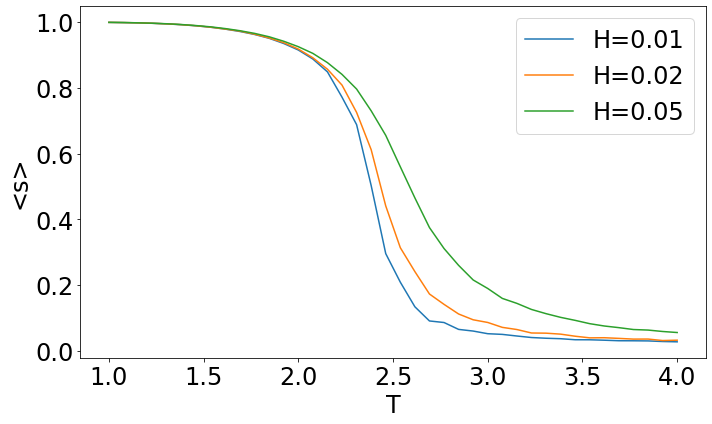

In [494]:
curve_plot([Ts, Ts, Ts], [np.array(s_list1), np.array(s_list2), np.array(s_list3)], xlabel='T', ylabel='<s>', 
          legends=['H=0.01','H=0.02', 'H=0.05'])

可见$m$或者$\langle s\rangle$会根据不同的$H$有显著的变化。然而，根据关系式

$$
m(t, h)  = |t|^{\beta} f_{\pm}\left(\frac{h}{|t|^{\beta \delta}}\right)。
$$



如果我们能够画出$m/|t|^{\beta}$和自变量$h/|t|^{\beta \delta}$之间的关系，应该会发现对于不同的$H$，只存在2条不同的曲线。让我们试试看。

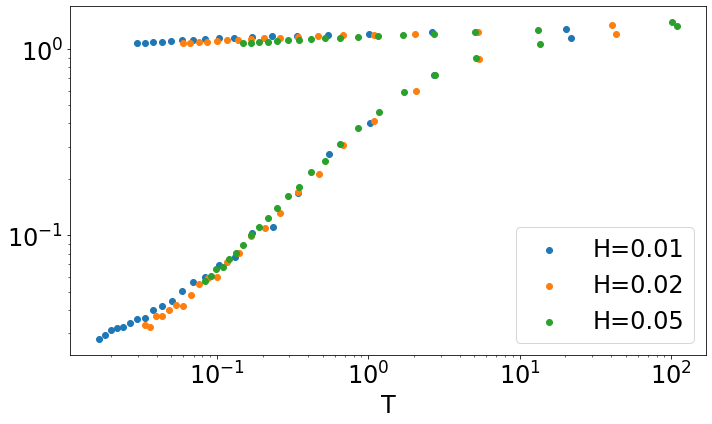

In [496]:
beta = 1/8
delta = 15
Tc = 2.27

t = (Ts - Tc) / Tc

ys1 = s_list1 / np.abs(t)**beta
ys2 = s_list2 / np.abs(t)**beta
ys3 = s_list3 / np.abs(t)**beta

H1 = 0.01
H2 = 0.02
H3 = 0.05
xs1 = H1 / np.abs(t)**(beta * delta)
xs2 = H2 / np.abs(t)**(beta * delta)
xs3 = H3 / np.abs(t)**(beta * delta)

curve_plot([xs1, xs2, xs3], [np.array(ys1), np.array(ys2), np.array(ys3)], xlabel='T', ylabel='', 
          legends=['H=0.01','H=0.02', 'H=0.05'], scatter='True', logx=True, logy=True)

的确，所有的数据散点都集中在两条线上，这正与我们的预测相符。我们称这种现象为数据塌缩（data collapsing）。

## 番外2:数据拟合

我们好像遗漏了一点东西。尽管我们宣称蒙特卡罗方法能够给予我们接近于精确的临界指数的结果：$\beta\approx 1/8$。我们尚未明确验证。而验证这种结果，需要我们能够对蒙特卡罗给予我们的$\langle s\rangle$与$T$之间的关系进行拟合。


我们想要的拟合关系是：
$$
\langle s \rangle \sim (T - T_c)^{\beta}
$$
这是一个幂指数关系（power law），这在很多物理问题中都非常常见。对于这样的关系，我们只需要很简单的方程两边取$\log$，就可以构造出一个线性关系：

$$
\ln (\langle s \rangle) \sim \beta \ln(T_c - T)
$$

对于这种线性关系，我们可以使用最简单的最小二乘拟合(least square fit)。在Python里，我们可以使用`np.polyfit`函数来进行拟合。

首先，让我们先提取我们需要的数据点。让我们假设$T_c=2.27$，然后仅仅在小于并且靠近$T_c$的地方取数据点：

In [593]:
Tc = 2.27
Ts2 = np.linspace(2.16, 2.26, 20)
n = 128

s_list = []

for T in Ts2:
    spins = np.ones((n, n), dtype=np.int32)
    avg_s = Metroplis_C(spins, Jdivk, 8000, T)
    s_list.append(np.mean(avg_s))

平均自旋大小 0.8266702880859375
平均自旋大小 0.8226641540527344
平均自旋大小 0.8184830627441406
平均自旋大小 0.8097890625
平均自旋大小 0.8052449035644531
平均自旋大小 0.7897171020507813
平均自旋大小 0.7926043090820313
平均自旋大小 0.7923199157714844
平均自旋大小 0.7766996459960938
平均自旋大小 0.7779766235351563
平均自旋大小 0.7636295471191407
平均自旋大小 0.7557290954589844
平均自旋大小 0.7531885375976562
平均自旋大小 0.7488133850097656
平均自旋大小 0.7218373107910157
平均自旋大小 0.7124076232910156
平均自旋大小 0.7132522277832031
平均自旋大小 0.6947002258300782
平均自旋大小 0.6845405883789063
平均自旋大小 0.662060546875


In [597]:
# 其中deg=1代表进行的是线性最小二乘拟合
# 答案fit[0]代表斜率，fit[1]代表截距
fit = np.polyfit(np.log(Tc - Ts2), np.log(np.array(s_list)), deg=1)

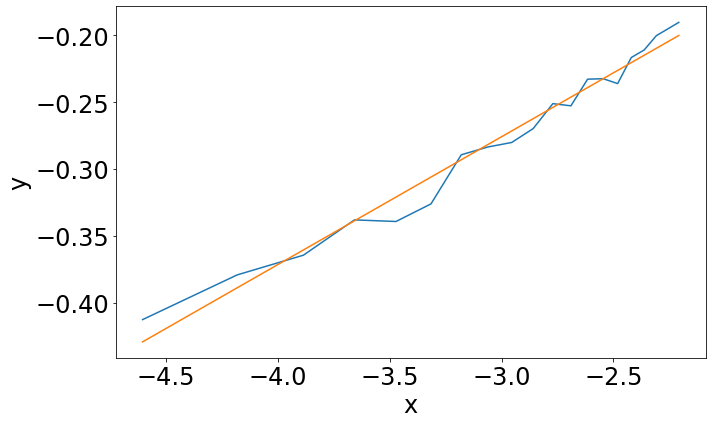

In [595]:
fit_x = np.log(Tc - Ts2)
fit_y = fit[0] * fit_x + fit[1]
curve_plot([np.log(Tc - Ts2), fit_x],
           [np.log(np.array(s_list)), fit_y])

In [598]:
# 打印斜率和截距
print(fit)

[0.095446   0.01053575]


斜率即为$\beta$

那么，假如我们不知道$T_c$的值该怎么办？